# **Materials Analysis**

# **1. Data Loading**




In [9]:
import kagglehub
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# --- 1. Download & Load Data ---
# Download dataset
path = kagglehub.dataset_download("allanwandia/material-science")

# Find the CSV file in the download folder
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
full_path = os.path.join(path, csv_files[0])

df = pd.read_csv(full_path)

Using Colab cache for faster access to the 'material-science' dataset.


# **2. Checking data information**




#Basic command for checking data information

```
df.info()
df.head()
df.tail()
df.describe()
df.columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86988 entries, 0 to 86987
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   material_id                86988 non-null  object 
 1   formula_pretty             86988 non-null  object 
 2   n_elements                 86988 non-null  int64  
 3   contains_transition_metal  86988 non-null  bool   
 4   formation_energy_per_atom  86988 non-null  float64
 5   energy_per_atom            86988 non-null  float64
 6   band_gap                   86988 non-null  float64
 7   is_semiconductor           86988 non-null  bool   
 8   density                    86988 non-null  float64
 9   volume                     86988 non-null  float64
 10  elements                   86988 non-null  object 
dtypes: bool(2), float64(5), int64(1), object(3)
memory usage: 6.1+ MB


# Check for missing values

In [6]:
# Check for missing values
print('Missing values in each column:')
print(df.isnull().sum())



Missing values in each column:
material_id                  0
formula_pretty               0
n_elements                   0
contains_transition_metal    0
formation_energy_per_atom    0
energy_per_atom              0
band_gap                     0
is_semiconductor             0
density                      0
volume                       0
elements                     0
dtype: int64


If any numeric columns have missing values, fill them with the median

In [10]:
# Basic cleaning: if any numeric columns have missing values, fill them with the median
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

# For any categorical columns with missing values, fill with 'Unknown'
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna('Unknown', inplace=True)

# Final shape after cleaning
print('Data shape after cleaning:', df.shape)

Data shape after cleaning: (86988, 11)


In [11]:
df.tail()

,material_id,formula_pretty,n_elements,contains_transition_metal,formation_energy_per_atom,energy_per_atom,band_gap,is_semiconductor,density,volume,elements
86983,mp-1001069,Li48P16S61,3,False,0.890142,0.773741,0.686062,True,-1.344163,6.430479,"['Li', 'P', 'S']"
86984,mp-676829,Li49Cu8N19,3,False,1.686606,0.543630,-0.868213,False,-1.028787,1.177355,"['Cu', 'Li', 'N']"
86985,mp-722623,Li66Be24H35,3,False,2.117250,1.320546,-0.868213,False,-1.966237,2.955622,"['Be', 'H', 'Li']"
86986,mp-647275,Ba39Li80N9,3,False,2.097097,1.405895,-0.868213,False,-0.814328,10.189519,"['Ba', 'Li', 'N']"
86987,mp-1185524,Li95Mn16O64,3,True,-0.079223,0.449108,-0.868213,False,-0.839734,3.685992,"['Li', 'Mn', 'O']"


In [12]:
df.describe()

,n_elements,formation_energy_per_atom,energy_per_atom,band_gap,density,volume
count,86988.000000,8.698800e+04,8.698800e+04,8.698800e+04,8.698800e+04,8.698800e+04
mean,3.886099,8.628976e-15,8.820440e-15,7.784048e-15,-1.248506e-14,-1.394490e-14
std,0.746630,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,2.000000,-2.333873e+00,-1.662359e+01,-8.682129e-01,-2.477204e+00,-1.194165e+00
25%,3.000000,-6.245452e-01,-1.117969e-01,-8.682129e-01,-5.720758e-01,-6.209157e-01
50%,4.000000,-2.581734e-01,6.315191e-02,-3.681771e-01,-1.676467e-01,-3.418060e-01
75%,4.000000,2.759976e-01,2.902369e-01,6.349414e-01,3.265572e-01,3.349606e-01
max,8.000000,7.952180e+00,2.055498e+00,5.033428e+00,1.032946e+01,1.992366e+01


# Exploratory Data Analysis

**Count Plot for boolean columns**

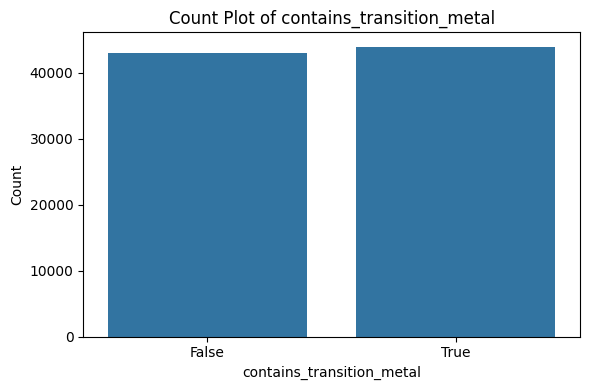

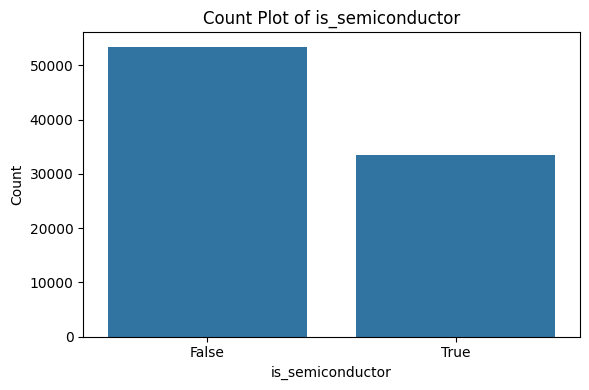

In [16]:
## Count Plot for boolean columns
bool_cols = df.select_dtypes(include=['bool']).columns
for col in bool_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

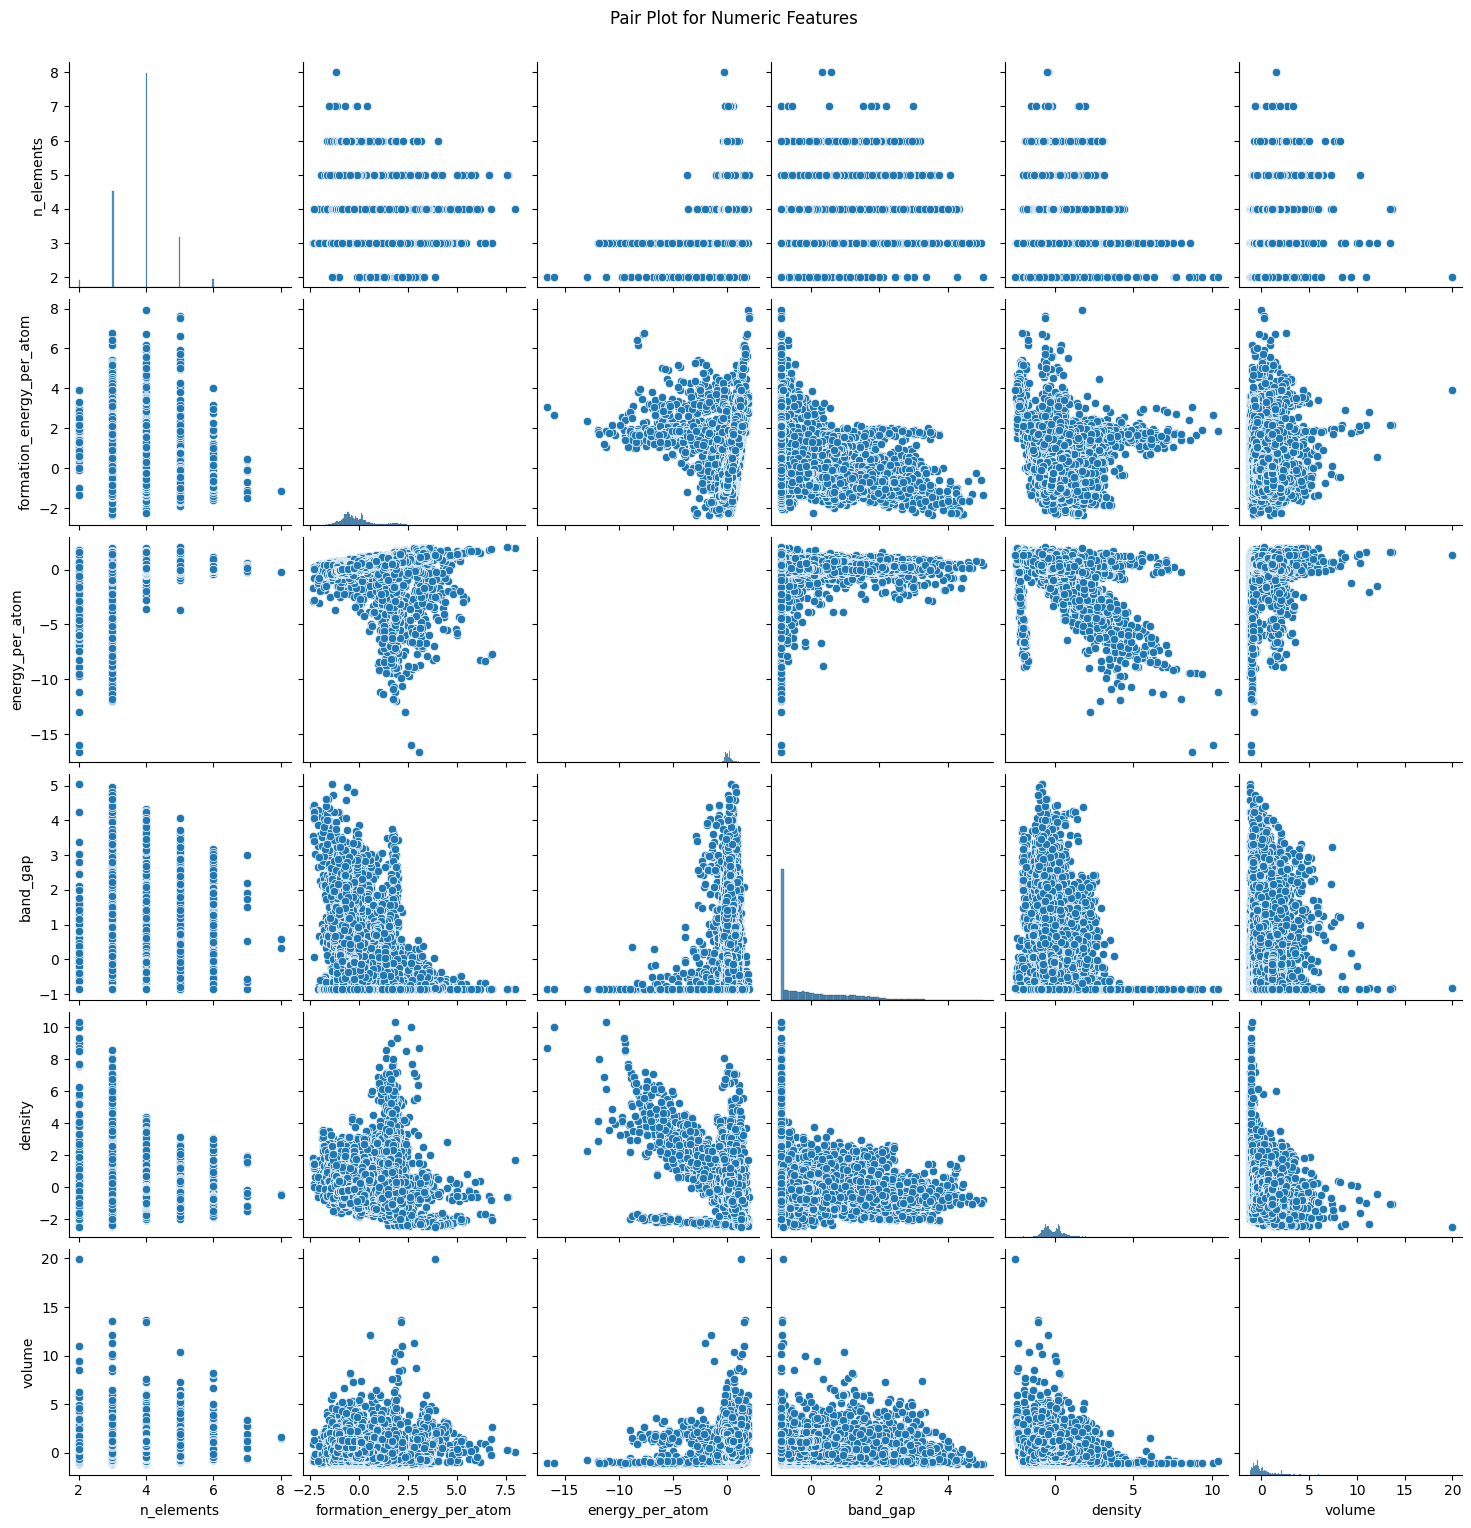

In [18]:
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot for Numeric Features', y=1.02)
plt.show()

# **3. Prediction Modeling**

# Define target variable and select feature set


In [30]:
df['is_semiconductor'].head(5)

,is_semiconductor
0,False
1,False
2,True
3,True
4,False


In [29]:
# Target: Convert True/False to 1/0

df_class = df.copy()
df_class['target'] = df_class['is_semiconductor'].astype(int)
df_class['target'].head(5)

,target
0,0
1,0
2,1
3,1
4,0


# Features: Physical properties

In [31]:
# Features: Physical properties
features = ['density', 'formation_energy_per_atom', 'volume', 'n_elements']
X = df_class[features]
y = df_class['target']

# Split Data

In [32]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model

In [33]:
# Train Model ---
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

print(f"Classifier trained on {len(X_train)} materials.")

Classifier trained on 69590 materials.


# **4. Model Evaluation**

In [39]:
# Evaluate ---
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 99.77%


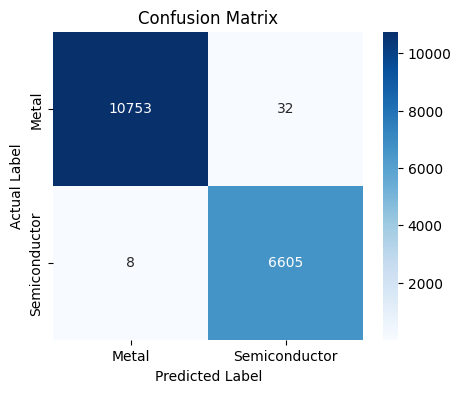

In [35]:
# Visualization (Confusion Matrix) ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Metal', 'Semiconductor'],
            yticklabels=['Metal', 'Semiconductor'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()



# **5. Model comparison**

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# ... (Imports and Data Split code remains the same) ...

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# --- TRACKING VARIABLES ---
best_model = None
best_score = 0.0
best_name = ""

print(f"{'Model Name':<25} | {'Accuracy':<10}")
print("-" * 40)

for name, model in models.items():

    # Train
    model.fit(X_train, y_train)

    # Evaluate
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"{name:<25} | {acc:.4f}")

    # --- CHECK IF THIS IS THE NEW CHAMPION ---
    if acc > best_score:
        best_score = acc
        best_model = model
        best_name = name

print("-" * 40)
print(f"🏆 The Winner is: {best_name} with {best_score:.4f} accuracy!")

# --- SAVE THE CHAMPION ---
joblib.dump(best_model, 'best_materials_model.pkl')
print(f"Saved {best_name} to 'best_materials_model.pkl'")

Model Name                | Accuracy  
----------------------------------------
Logistic Regression       | 0.7038
Gradient Boosting         | 0.7681
Random Forest             | 0.9977
----------------------------------------
🏆 The Winner is: Random Forest with 0.9977 accuracy!
Saved Random Forest to 'best_materials_model.pkl'


# **6. Feature importances**

                     Feature  Importance
1  formation_energy_per_atom    0.377212
0                    density    0.316831
2                     volume    0.263296
3                 n_elements    0.042661


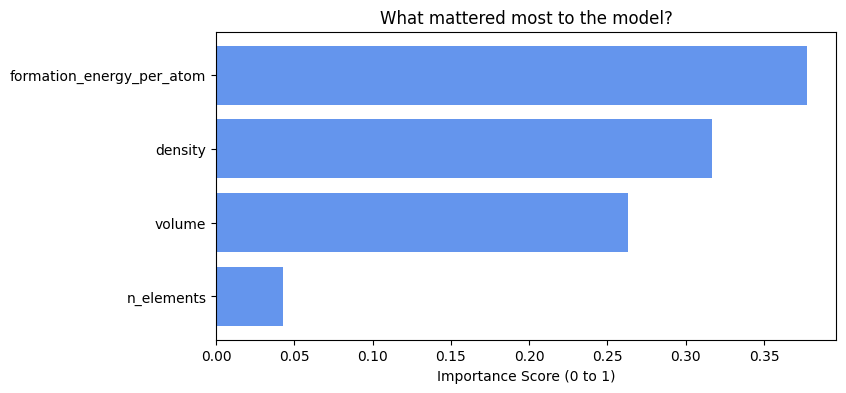

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Get the importance scores
# Note: This only works for Random Forest / Gradient Boosting / Decision Trees
importances = best_model.feature_importances_

# 2. Organize them into a clean table
# 'features' is the list you defined at the very beginning:
# ['density', 'formation_energy_per_atom', 'volume', 'n_elements']
feature_table = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# 3. Sort by importance (Highest on top)
feature_table = feature_table.sort_values(by='Importance', ascending=False)

print(feature_table)

# 4. (Optional) Visualize it!
plt.figure(figsize=(8, 4))
plt.barh(feature_table['Feature'], feature_table['Importance'], color='cornflowerblue')
plt.xlabel('Importance Score (0 to 1)')
plt.title('What mattered most to the model?')
plt.gca().invert_yaxis() # Put the most important at the top
plt.show()

# **7. Load the best model**

In [51]:
import joblib
import pandas as pd

# 1. LOAD the model
loaded_model = joblib.load('best_materials_model.pkl')

# 2. PREPARE INPUT
# Define the raw values
['density' 'formation_energy_per_atom' 'volume' 'n_elements']

raw_data = [[5.0, -1.2, 100, 3]]

# FIX: Create a DataFrame using the feature names stored in the model
# This tells sklearn exactly which value corresponds to which feature
new_material_df = pd.DataFrame(raw_data, columns=loaded_model.feature_names_in_)

# 3. PREDICT (Warning will be gone)
prediction = loaded_model.predict(new_material_df)

print("Prediction:",
      "🟢 Semiconductor" if prediction[0] == 1 else "🔴 Not Semiconductor")


Prediction: 🔴 Not Semiconductor
